### Loading the Dataset ###

In [2]:
import pandas as pd
sales_data = pd.read_csv("D:\\datasets\\Resume dataset\\sales_data.csv")

### Understanding the datastructure ###

In [3]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sale_Date         365 non-null    object 
 1   Product_ID        365 non-null    int64  
 2   Product_Category  365 non-null    object 
 3   Region            365 non-null    object 
 4   Sales_Amount      365 non-null    float64
 5   Discount          365 non-null    float64
 6   Quantity_Sold     365 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 20.1+ KB


In [4]:
sales_data.head()

,Sale_Date,Product_ID,Product_Category,Region,Sales_Amount,Discount,Quantity_Sold
0,2023-01-01,1051,Grocery,North,278.87,28.48,9
1,2023-01-02,1092,Electronics,East,271.87,11.90,3
2,2023-01-03,1014,Grocery,North,184.44,28.62,10
3,2023-01-04,1071,Grocery,North,448.17,4.05,19
4,2023-01-05,1060,Clothing,South,73.09,14.51,3


### Summary Statistics ###

In [5]:
sales_data.describe()

,Product_ID,Sales_Amount,Discount,Quantity_Sold
count,365.000000,365.000000,365.000000,365.000000
mean,1048.676712,262.782137,15.281808,9.635616
std,29.722242,135.401362,9.070682,5.448192
min,1000.000000,11.270000,0.010000,1.000000
25%,1023.000000,156.800000,7.360000,5.000000
50%,1050.000000,271.870000,15.750000,10.000000
75%,1074.000000,377.310000,23.130000,14.000000
max,1099.000000,498.870000,29.980000,19.000000


### Check for missing values ###

In [6]:
sales_data.isnull().sum()

Sale_Date           0
Product_ID          0
Product_Category    0
Region              0
Sales_Amount        0
Discount            0
Quantity_Sold       0
dtype: int64

### Univariate Analysis ###

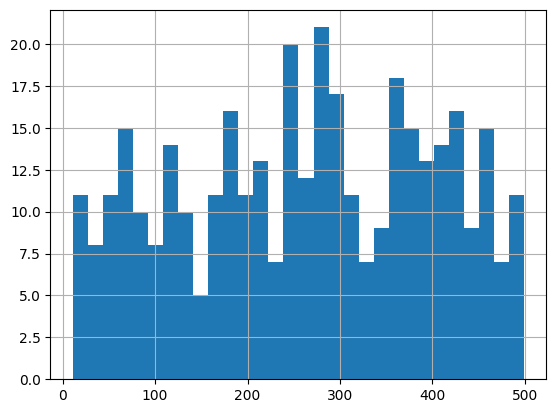

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sales_data['Sales_Amount'].hist(bins=30)
plt.show()

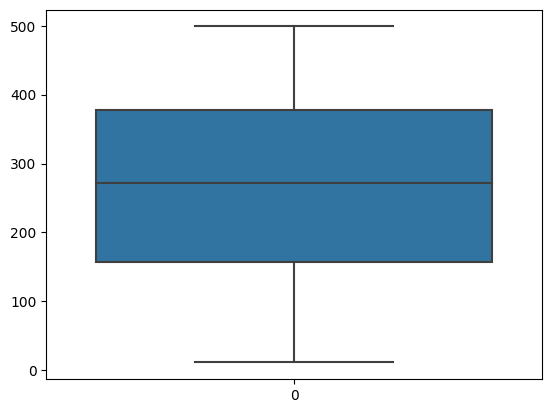

In [13]:
sns.boxplot(sales_data['Sales_Amount'])
plt.show()

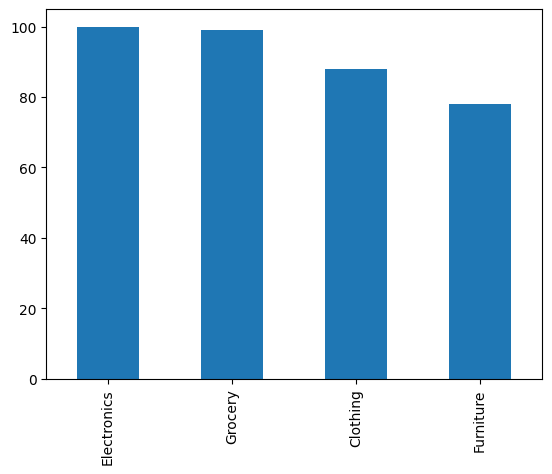

In [9]:
sales_data['Product_Category'].value_counts().plot(kind='bar')
plt.show()

### Bivariate Analysis ###

C:\Users\sures\AppData\Local\Temp\ipykernel_32848\1100010733.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = sales_data.corr()


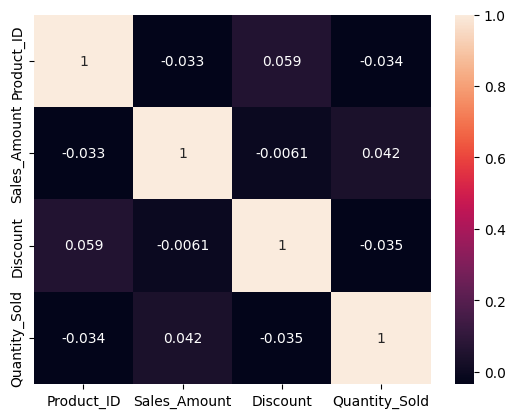

In [12]:
corr_matrix = sales_data.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

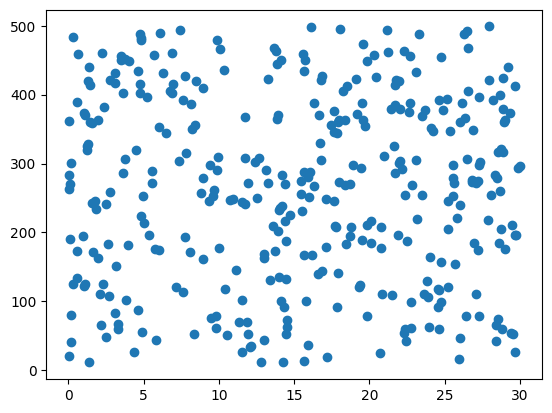

In [11]:
plt.scatter(sales_data['Discount'], sales_data['Sales_Amount'])
plt.show()

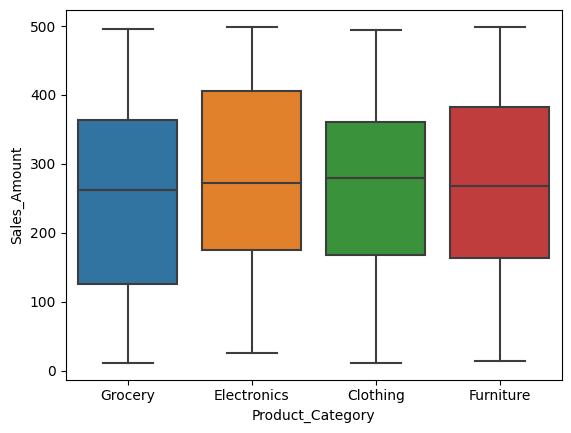

In [15]:
sns.boxplot(x = 'Product_Category', y = 'Sales_Amount', data = sales_data)
plt.show()

### Time Series Analysis ###

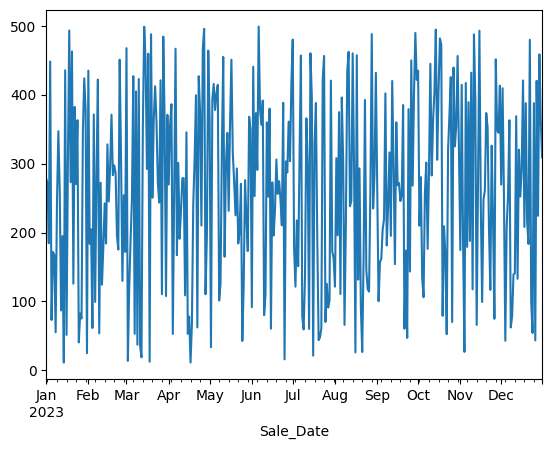

In [16]:
sales_data['Sale_Date'] = pd.to_datetime(sales_data['Sale_Date'])
sales_data.groupby('Sale_Date')['Sales_Amount'].sum().plot()
plt.show()

### Outlier Detection ###

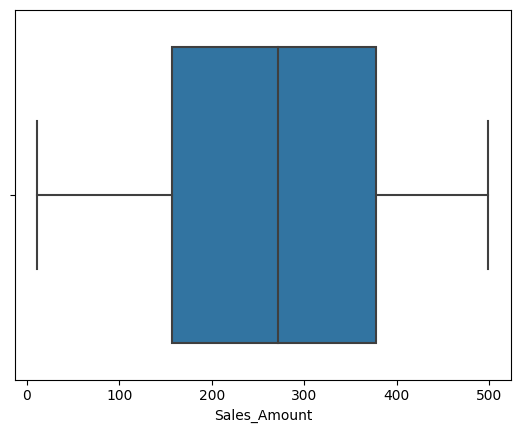

In [17]:
sns.boxplot(x = sales_data['Sales_Amount'])
plt.show()

### Model Biulding ###

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [19]:
sales_data['Sale_Date'] = pd.to_datetime(sales_data['Sale_Date'])

In [20]:
sales_data['Year'] = sales_data['Sale_Date'].dt.year
sales_data['Month'] = sales_data['Sale_Date'].dt.month
sales_data['Day'] = sales_data['Sale_Date'].dt.day

In [21]:
sales_data = sales_data.drop(columns=['Sale_Date'])

In [22]:
sales_data = pd.get_dummies(sales_data, columns=['Product_Category', 'Region'], drop_first=True)

In [23]:
X = sales_data.drop(columns=['Sales_Amount'])
y = sales_data['Sales_Amount'] 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)

In [27]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 112.22326617878763
Mean Squared Error (MSE): 18465.04847273755
Root Mean Squared Error (RMSE): 135.88615997494944


In [30]:
columns = X_train.columns
new_data = pd.DataFrame({
    'Product_ID': [1025],
    'Discount': [10],
    'Quantity_Sold': [4],
    'Year': [2024],
    'Month': [9],
    'Day': [15],
    'Product_Category_Clothing': [0],
    'Product_Category_Electronics': [1],
    'Product_Category_Furniture': [0],
    'Region_North': [1],
    'Region_South': [0],
    'Region_West': [0]
})

In [31]:
new_data = new_data.reindex(columns=columns, fill_value=0)
new_prediction = model.predict(new_data)
print(f"Predicted Sales Amount: {new_prediction[0]}")

Predicted Sales Amount: 289.0184548866188
